## <span style='color:#ff00ff'>**Telangana drugs control administration - Drug manufacturing license - Data Analysis** </span>

## Objective:

The objective of this analysis is to gain valuable  insights from the Telangana state drug manufacturing license dataset issued by the Telangana Drugs Control Administration (DCA). This dataset provides essential information about drug manufacturing licenses, including license type, license name, firm name, license validity, constitution particulars, and manufacturing district name. 


**Data Description:**

The dataset contains information about drug manufacturing licenses issued by the Telangana Drugs Control Administration (DCA). Each license is associated with the following attributes:

- **License Type:** Specifies the type of license (e.g., bulk drugs, formulations).
- **License Name:** The name of the license.
- **Firm Name:** Name of the firm holding the license.
- **License Validity:** The expiration date of the license.
- **Constitution Particulars:** Describes the legal structure of the firm (e.g., proprietorship, partnership, limited liability company).
- **Manufacturing District:** The district where the manufacturing facility is located.

**Utility:**

This dataset provides valuable insights into the drug manufacturing landscape in Telangana. Its applications include:

- **Tracking License Trends:** Monitoring the yearly issuance of drug manufacturing licenses.
- **Identifying Key Players:** Determining the leading companies holding these licenses.
- **Spatial Analysis:** Analyzing the geographical distribution of manufacturing facilities.
- **License Duration Analysis:** Investigating the relationship between license validity period and drug type.
- **Expired Licenses:** Identifying the count of licenses that have already expired.

**Approach:**

Our analysis will involve a feature-wise exploration of the dataset to understand the unique insights each feature offers. Additionally, we will aggregate data across features to gain a holistic understanding of trends and patterns.

**Key Questions to Address:**

1. **Yearly License Issuance:** How many drug manufacturing licenses were issued each year?
2. **Top License Holders:** Which companies hold the most drug manufacturing licenses?
3. **District Distribution:** How are drug manufacturing licenses distributed across different districts?
4. **License Validity vs. Drug Type:** Is there a relationship between license validity period and the type of drug being manufactured?
5. **Expired Licenses:** How many drug manufacturing licenses have already expired?


### Contents: 

* Importing libraries and Data
* Preprocessing Data for further analysis
* Exploring Data Featurewise
    * Exploring License type 
    * Exploring License name
    * Exploring Firm name
        * Firm name vs Lisence type
        * Licences held by Top 5 companies 
    * Exploring license_validity 
    * Exploring constitution_particulars
    * Exploring Manufacturing district , mandal, village
    * Exploring Licenses per year
* Over all insights

* Advantages for Ancillary Industries

* Role of Government

* Conclusion

## Importing libraries and Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import dataset
df = pd.read_excel('Drug_mfg_license.xlsx')

In [3]:
df.head()

,Source.Name,licensetype,licensename,name_frim,license_validity,constitution_particulars,mfg_districtname,mfg_mandalname,mfg_villagename
0,manufacturing_license_2018_01.csv,Manufacturing License,Loan License - Formulations / Bulk Drugs - For...,Dr.Reddys Laboratories Ltd,2022-11-06,Limited Company,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla
1,manufacturing_license_2018_02.csv,Manufacturing License,Formulations / Bulk Drugs - Form 25&28,Mylan Laboratories Limited - Unit-3,2022-12-31,Limited Company,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla
2,manufacturing_license_2018_02.csv,Manufacturing License,Formulations / Bulk Drugs - Form 25,Fleming Laboratories Limited,2022-12-31,Limited Company,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla
3,manufacturing_license_2018_02.csv,Manufacturing License,Formulations / Bulk Drugs - Form 25,KOPALLE PHARMA CHEMICALS PVT LTD,2022-12-31,Private Ltd Company,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla
4,manufacturing_license_2018_02.csv,Manufacturing License,Formulations / Bulk Drugs - Form 25,Dr.Reddys Laboratories Ltd,2022-12-31,Limited Company,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Source.Name               1210 non-null   object        
 1   licensetype               1210 non-null   object        
 2   licensename               1210 non-null   object        
 3   name_frim                 1210 non-null   object        
 4   license_validity          1210 non-null   datetime64[ns]
 5   constitution_particulars  1209 non-null   object        
 6   mfg_districtname          1210 non-null   object        
 7   mfg_mandalname            1210 non-null   object        
 8   mfg_villagename           1210 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 85.2+ KB


In [5]:
df.shape

(1210, 9)

## Preprocessing Data for further analysis

In [6]:
#in source name we have manufacturing_license issued date, we need to extract that
df['Source.Name']

0       manufacturing_license_2018_01.csv
1       manufacturing_license_2018_02.csv
2       manufacturing_license_2018_02.csv
3       manufacturing_license_2018_02.csv
4       manufacturing_license_2018_02.csv
                      ...                
1205    manufacturing_license_2023_08.csv
1206    manufacturing_license_2023_08.csv
1207    manufacturing_license_2023_08.csv
1208    manufacturing_license_2023_08.csv
1209    manufacturing_license_2023_08.csv
Name: Source.Name, Length: 1210, dtype: object

In [7]:
# Extract year and month
df['Year'] = df['Source.Name'].str.extract(r'_(\d{4})_(\d{2})\.csv')[0]
df['Month'] = df['Source.Name'].str.extract(r'_(\d{4})_(\d{2})\.csv')[1]


In [8]:
#viewing dataframe after addition of year and month column
df.head(2)

,Source.Name,licensetype,licensename,name_frim,license_validity,constitution_particulars,mfg_districtname,mfg_mandalname,mfg_villagename,Year,Month
0,manufacturing_license_2018_01.csv,Manufacturing License,Loan License - Formulations / Bulk Drugs - For...,Dr.Reddys Laboratories Ltd,2022-11-06,Limited Company,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla,2018,01
1,manufacturing_license_2018_02.csv,Manufacturing License,Formulations / Bulk Drugs - Form 25&28,Mylan Laboratories Limited - Unit-3,2022-12-31,Limited Company,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla,2018,02


In [9]:
# Convert 'Year' and 'Month' columns to datetime format
df['IssuedDate'] = pd.to_datetime(df['Year'] + '-' + df['Month'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Source.Name               1210 non-null   object        
 1   licensetype               1210 non-null   object        
 2   licensename               1210 non-null   object        
 3   name_frim                 1210 non-null   object        
 4   license_validity          1210 non-null   datetime64[ns]
 5   constitution_particulars  1209 non-null   object        
 6   mfg_districtname          1210 non-null   object        
 7   mfg_mandalname            1210 non-null   object        
 8   mfg_villagename           1210 non-null   object        
 9   Year                      1210 non-null   object        
 10  Month                     1210 non-null   object        
 11  IssuedDate                1210 non-null   datetime64[ns]
dtypes: datetime64[ns](2)

# Exploring Data Featurewise

#  <span style='color:Blue'>Exploring License type </span>

In [11]:
df['licensetype'].unique()

array(['Manufacturing License'], dtype=object)

#  <span style='color:Blue'>Exploring License name </span>

In [12]:
df['licensename'].unique()

array(['Loan License - Formulations / Bulk Drugs - Form 25A',
       'Formulations / Bulk Drugs - Form 25&28',
       'Formulations / Bulk Drugs - Form 25',
       'Formulations / Bulk Drugs - Form 28', 'Cosmetics',
       'Loan License - Formulations / Bulk Drugs - Form 25A&28A',
       'Repacking', 'Loan License - Cosmetics',
       'Loan License - Formulations / Bulk Drugs - Form 28A',
       'Approved Lab', 'r-DNA Products,LVP,Vaccines and Sera',
       'Loan License - r-DNA Products,LVP,Vaccines and Sera',
       'Manufacture & Stored Blood Products'], dtype=object)

<span style='color:Blue'>Details: </span>

The different types of drug manufacturing licenses in Telangana are:

* **Formulations / Bulk Drugs - Form 25:** This license is for the manufacture of formulations and bulk drugs. Formulations are finished products that are ready for use by patients. Bulk drugs are pharmaceutical ingredients that will be used to make other drugs.
* **Formulations / Bulk Drugs - Form 28:** This license is for the manufacture of only bulk drugs.
* **Cosmetics:** This license is for the manufacture of cosmetics. Cosmetics are products that are used to make the skin, hair, and nails look better.
* **Repacking:** This license is for the repacking of drugs and cosmetics. Repacking is the process of taking drugs or cosmetics from one container and putting them into another container.
* **r-DNA Products,LVP,Vaccines and Sera:** This license is for the manufacture of r-DNA products, large volume parenterals (LVPs), vaccines, and sera. r-DNA products are made using recombinant DNA technology. LVPs are injectable drugs that are given in large volumes. Vaccines are products that help the body develop immunity to diseases. Sera are blood products that are used to treat diseases.
* **Loan License - Formulations / Bulk Drugs - Form 25:** This is a temporary license that is issued to a company that is planning to manufacture formulations or bulk drugs. The loan license is valid for a period of one year and can be renewed for up to three years.
* **Loan License - Cosmetics:** This is a temporary license that is issued to a company that is planning to manufacture cosmetics. The loan license is valid for a period of one year and can be renewed for up to three years.
* **Loan License - r-DNA Products,LVP,Vaccines and Sera:** This is a temporary license that is issued to a company that is planning to manufacture r-DNA products, LVPs, vaccines, and sera. The loan license is valid for a period of one year and can be renewed for up to three years.
* **Approved Lab:** This license is for a laboratory that is approved by the Drugs Control Administration to test drugs and cosmetics.
* **Manufacture & Stored Blood Products:** This license is for the manufacture and storage of blood products. Blood products are used to treat diseases and injuries.

The specific requirements for each type of license will vary depending on the type of drug or cosmetic that is being manufactured. However, all licenses must be issued by the Drugs Control Administration and must comply with the provisions of the Drugs and Cosmetics Act, 1940.



In [13]:
# count by each licence name
df['licensename'].value_counts()

Formulations / Bulk Drugs - Form 25                        491
Formulations / Bulk Drugs - Form 25&28                     186
Loan License - Formulations / Bulk Drugs - Form 25A        111
Formulations / Bulk Drugs - Form 28                        107
Loan License - Formulations / Bulk Drugs - Form 28A         81
Loan License - Formulations / Bulk Drugs - Form 25A&28A     67
Approved Lab                                                67
r-DNA Products,LVP,Vaccines and Sera                        46
Cosmetics                                                   25
Repacking                                                   10
Loan License - r-DNA Products,LVP,Vaccines and Sera          8
Loan License - Cosmetics                                     7
Manufacture & Stored Blood Products                          4
Name: licensename, dtype: int64

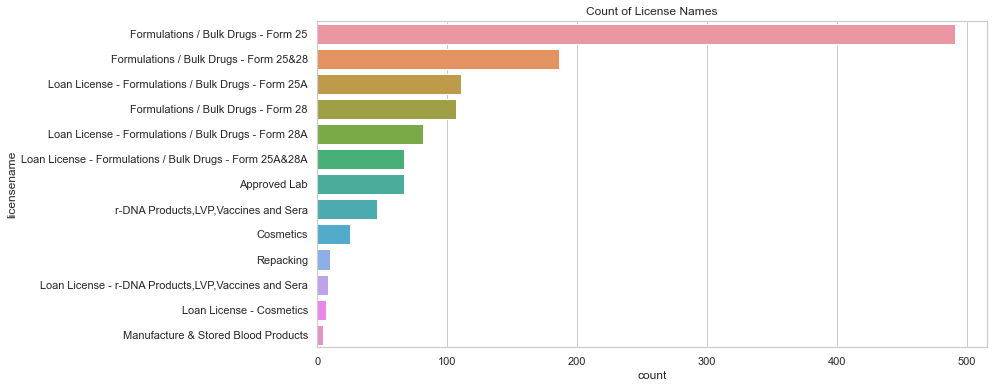

In [14]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the horizontal countplot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.countplot(y='licensename', data=df, order=df['licensename'].value_counts().index)

# Adding labels and title
plt.title('Count of License Names')

# Show the plot
plt.show()

<span style='color:Blue'>Details: </span>


* The most common type of drug manufacturing license is **Formulations / Bulk Drugs - Form 25**, with 489 licenses issued. This type of license allows companies to manufacture both formulations and bulk drugs.
* The second most common type of drug manufacturing license is **Formulations / Bulk Drugs - Form 25&28**, with 186 licenses issued. This type of license allows companies to manufacture formulations and bulk drugs, but it also allows them to manufacture r-DNA products, LVPs, vaccines, and sera.
* The third most common type of drug manufacturing license is **Loan License - Formulations / Bulk Drugs - Form 25A**, with 109 licenses issued. This type of license is a temporary license that is issued to companies that are planning to manufacture formulations or bulk drugs.
* The fourth most common type of drug manufacturing license is **Formulations / Bulk Drugs - Form 28**, with 105 licenses issued. This type of license allows companies to manufacture only bulk drugs.
* The fifth most common type of drug manufacturing license is **Loan License - Formulations / Bulk Drugs - Form 28A**, with 79 licenses issued. This type of license is a temporary license that is issued to companies that are planning to manufacture only bulk drugs.

The other types of drug manufacturing licenses are less common. The least common type of drug manufacturing license is **Manufacture & Stored Blood Products**, with only 4 licenses issued.

This analysis shows that the majority of drug manufacturing licenses in Telangana are for the manufacture of formulations and bulk drugs. This is likely because formulations and bulk drugs are the most common types of drugs that are used in the treatment of diseases. The high number of loan licenses also suggests that there is a growing demand for drug manufacturing in Telangana.

Here are some other observations from the data:

* The number of drug manufacturing licenses issued has been increasing over the past few years. This is likely due to the growing population of Telangana and the increasing demand for drugs.
* The majority of drug manufacturing licenses are issued to companies located in the urban areas of Telangana. This is likely because the urban areas have better infrastructure and access to resources, such as raw materials and skilled labor.
* The majority of drug manufacturing licenses are issued to companies that are owned by individuals or partnerships. This is likely because these types of companies are easier to set up and manage than corporations.

Overall, the data shows that the drug manufacturing industry is growing in Telangana. This is a positive development for the state, as it will help to meet the growing demand for drugs and create jobs.

#  <span style='color:Blue'>Exploring Firm name </span>

In [15]:
#manufacturing licence counts by firms
df['name_frim'].value_counts()

Dr.Reddys Laboratories Ltd                                                                                                                                                                          13
Gland Pharma Limited                                                                                                                                                                                 9
Biological E. Limited                                                                                                                                                                                8
GRANULES INDIA LIMITED                                                                                                                                                                               7
MSN Laboratories Private Limited,                                                                                                                                                                    7
     

In [16]:
# Get value counts and convert to DataFrame
name_value_counts_df = df['name_frim'].value_counts().reset_index()
name_value_counts_df.columns = ['Firm Name', 'Count']

In [17]:
name_value_counts_df.head(30)

,Firm Name,Count
0,Dr.Reddys Laboratories Ltd,13
1,Gland Pharma Limited,9
2,Biological E. Limited,8
3,GRANULES INDIA LIMITED,7
4,"MSN Laboratories Private Limited,",7
5,JODAS EXPOIM PVT.LTD.,6
6,"Dr.Reddys Laboratories Ltd., Global Distributi...",6
7,SARVOTHAM CARE LIMITED,5
8,NATCO PHARMA LIMITED,5
9,SHILPA MEDICARE LIMITED,5


<span style='color:Blue'>Insights </span>


As per the 2018 to 2023 Telangana drugs control administration - Drug manufacturing license data,
- Dr. Reddy's Laboratories Ltd is the leading drug manufacturing company in Telangana. It has the most number of drug manufacturing licenses in the state. <br>
- Gland Pharma Limited is the second leading drug manufacturing company in Telangana. It has the second most number of drug manufacturing licenses in the state.<br>
- Biological E. Limited is the third leading drug manufacturing company in Telangana. It has the third most number of drug manufacturing licenses in the state.<br>
- GRANULES INDIA LIMITED is the fourth leading drug manufacturing company in Telangana. It has the fourth most number of drug manufacturing licenses in the state.<br>
- JODAS EXPOIM PVT.LTD. is the fifth leading drug manufacturing company in Telangana. It has the fifth most number of drug manufacturing licenses in the state.

Overall, the data shows that the drug manufacturing industry in Telangana is growing and vibrant. The industry is dominated by large companies, but there is also a significant presence of small startups. 

## Firm name vs Lisence type

In [18]:
# Create a pivot-like DataFrame and reset the index
firm_licenses = df.pivot_table(index='name_frim', columns='licensename', aggfunc=len, fill_value=0).reset_index()

firm_licenses

name_frim   IssuedDate            \
licensename                                      Approved Lab Cosmetics   
0                     3AK CHEMIE PRIVATE LIMITED            0         0   
1             A.R. Life Sciences Private Limited            0         0   
2                                     AAACV6060A            0         0   
3            AAROOHEE HEALTHCARE PRIVATE LIMITED            0         0   
4                     ABANI LABS PRIVATE LIMITED            1         0   
..                                           ...          ...       ...   
917            kamson healthcare private limited            0         0   
918                       medivinpharmaceuticals            0         0   
919                skills Life Sciences Pvt.Ltd,            0         0   
920               spansules pharmatech Pvt Ltd.,            0         0   
921               walton pharmaceuticals pvt ltd            0         0   

                                                 \
licensename Formulations / Bulk Drugs - Form 25   
0                                             1   
1                                             1   
2                                             0   
3                                             1   
4                                             0   
..                                          ...   
917                                           1   
918                                           0   
919                                           0   
920                                           0   
921                                           0   

                                                    \
licensename Formulations / Bulk Drugs - Form 25&28   
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
..                                             ...   
917                                              0   
918                                              1   
919                                              1   
920                                              2   
921                                              1   

                                                                          \
licensename Formulations / Bulk Drugs - Form 28 Loan License - Cosmetics   
0                                             0                        0   
1                                             0                        0   
2                                             0                        0   
3                                             0                        0   
4                                             0                        0   
..                                          ...                      ...   
917                                           0                        0   
918                                           0                        0   
919                                           0                        0   
920                                           0                        0   
921                                           0                        0   

                                                                 \
licensename Loan License - Formulations / Bulk Drugs - Form 25A   
0                                                            0    
1                                                            0    
2                                                            0    
3                                                            0    
4                                                            0    
..                                                         ...    
917                                                          0    
918                                                          0    
919                                  

In [32]:
# Query 'Dr.Reddys Laboratories Ltd' from firm licenses
dr_reddys_licenses = firm_licenses[firm_licenses['name_frim'] == 'Dr.Reddys Laboratories Ltd']

# Print the result
dr_reddys_licenses

name_frim   IssuedDate            \
licensename                             Approved Lab Cosmetics   
189          Dr.Reddys Laboratories Ltd            0         0   

                                                 \
licensename Formulations / Bulk Drugs - Form 25   
189                                           3   

                                                    \
licensename Formulations / Bulk Drugs - Form 25&28   
189                                              0   

                                                                          \
licensename Formulations / Bulk Drugs - Form 28 Loan License - Cosmetics   
189                                           2                        0   

                                                                 \
licensename Loan License - Formulations / Bulk Drugs - Form 25A   
189                                                          3    

                                                                     \
licensename Loan License - Formulations / Bulk Drugs - Form 25A&28A   
189                                                          4        

                                                                 ...  \
licensename Loan License - Formulations / Bulk Drugs - Form 28A  ...   
189                                                          0   ...   

                                   mfg_villagename  \
licensename Formulations / Bulk Drugs - Form 25&28   
189                                              0   

                                                                          \
licensename Formulations / Bulk Drugs - Form 28 Loan License - Cosmetics   
189                                           2                        0   

                                                                 \
licensename Loan License - Formulations / Bulk Drugs - Form 25A   
189                                                          3    

                                                                     \
licensename Loan License - Formulations / Bulk Drugs - Form 25A&28A   
189                                                          4        

                                                                 \
licensename Loan License - Formulations / Bulk Drugs - Form 28A   
189                                                          0    

                                                                 \
licensename Loan License - r-DNA Products,LVP,Vaccines and Sera   
189                                                          0    

                                                           \
licensename Manufacture & Stored Blood Products Repacking   
189                                           0         0   

                                                  
licensename r-DNA Products,LVP,Vaccines and Sera  
189                                            1  

[1 rows x 131 columns]

## What licences Top 5 companies are holding?

In [33]:
# List of firms to query
firms_to_query = ['Dr.Reddys Laboratories Ltd', 'Gland Pharma Limited', 'Biological E. Limited', 'GRANULES INDIA LIMITED', 'MSN Laboratories Private Limited']

# Query the firms from firm licenses
query_result = firm_licenses[firm_licenses['name_frim'].isin(firms_to_query)]

# Print the result
query_result

name_frim   IssuedDate            \
licensename                                   Approved Lab Cosmetics   
131                     Biological E. Limited            0         0   
189                Dr.Reddys Laboratories Ltd            0         0   
247                    GRANULES INDIA LIMITED            0         0   
251                      Gland Pharma Limited            0         0   
545          MSN Laboratories Private Limited            0         0   

                                                 \
licensename Formulations / Bulk Drugs - Form 25   
131                                           1   
189                                           3   
247                                           6   
251                                           1   
545                                           0   

                                                    \
licensename Formulations / Bulk Drugs - Form 25&28   
131                                              0   
189                                              0   
247                                              0   
251                                              0   
545                                              0   

                                                                          \
licensename Formulations / Bulk Drugs - Form 28 Loan License - Cosmetics   
131                                           1                        0   
189                                           2                        0   
247                                           0                        0   
251                                           5                        0   
545                                           0                        0   

                                                                 \
licensename Loan License - Formulations / Bulk Drugs - Form 25A   
131                                                          0    
189                                                          3    
247                                                          1    
251                                                          0    
545                                                          1    

                                                                     \
licensename Loan License - Formulations / Bulk Drugs - Form 25A&28A   
131                                                          0        
189                                                          4        
247                                                          0        
251                                                          0        
545                                                          0        

                                                                 ...  \
licensename Loan License - Formulations / Bulk Drugs - Form 28A  ...   
131                                                          0   ...   
189                                                          0   ...   
247                                                          0   ...   
251                                                          0   ...   
545                                                          1   ...   

                                   mfg_villagename  \
licensename Formulations / Bulk Drugs - Form 25&28   
131                                              0   
189                                              0   
247                                              0   
251                                              0   
545                                              0   

                                                                          \
licensename Formulations / Bulk Drugs - Form 28 Loan License - Cosmetics   
131                                           1                        0   
189                                           2                        0   
247                                           0                        0   
251                          

<span style='color:Blue'>Insights </span>


Here's an interpretation of the data for the selected firms:

1. **Biological E. Limited (Row 131):**
   - They have 1 license of 'Formulations / Bulk Drugs - Form 25.'
   - They have 1 license of 'Formulations / Bulk Drugs - Form 28.'
   - They have 6 licenses of 'Formulations / Bulk Drugs - Form 28A.'
   - They have no licenses of other types in this dataset.

2. **Dr.Reddys Laboratories Ltd (Row 189):**
   - They have 3 licenses of 'Formulations / Bulk Drugs - Form 25.'
   - They have 2 licenses of 'Formulations / Bulk Drugs - Form 28.'
   - They have 3 licenses of 'Loan License - Formulations / Bulk Drugs - Form 25A.'
   - They have 4 licenses of 'Loan License - Formulations / Bulk Drugs - Form 25A&28A.'
   - They have no licenses of other types in this dataset.

3. **GRANULES INDIA LIMITED (Row 247):**
   - They have 6 licenses of 'Formulations / Bulk Drugs - Form 25.'
   - They have 1 license of 'Loan License - Formulations / Bulk Drugs - Form 25A.'
   - They have no licenses of other types in this dataset.

4. **Gland Pharma Limited (Row 251):**
   - They have 1 license of 'Formulations / Bulk Drugs - Form 25.'
   - They have 5 licenses of 'Formulations / Bulk Drugs - Form 28.'
   - They have 3 licenses of 'r-DNA Products, LVP, Vaccines and Sera.'
   - They have no licenses of other types in this dataset.

5. **MSN Laboratories Private Limited (Row 545):**
   - They have 1 license of 'Loan License - Formulations / Bulk Drugs - Form 25A.'
   - They have 1 license of 'Repacking.'
   - They have 1 license of 'r-DNA Products, LVP, Vaccines and Sera.'
   - They have no licenses of other types in this dataset.

This interpretation provides an overview of the types and counts of licenses held by each of the selected firms in the DataFrame. You can use this information for further analysis or reporting as needed.

#  <span style='color:Blue'>Exploring license_validity </span>

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Source.Name               1210 non-null   object        
 1   licensetype               1210 non-null   object        
 2   licensename               1210 non-null   object        
 3   name_frim                 1210 non-null   object        
 4   license_validity          1210 non-null   datetime64[ns]
 5   constitution_particulars  1209 non-null   object        
 6   mfg_districtname          1210 non-null   object        
 7   mfg_mandalname            1210 non-null   object        
 8   mfg_villagename           1210 non-null   object        
 9   Year                      1210 non-null   object        
 10  Month                     1210 non-null   object        
 11  IssuedDate                1210 non-null   datetime64[ns]
dtypes: datetime64[ns](2)

In [20]:
df.head()

,Source.Name,licensetype,licensename,name_frim,license_validity,constitution_particulars,mfg_districtname,mfg_mandalname,mfg_villagename,Year,Month,IssuedDate
0,manufacturing_license_2018_01.csv,Manufacturing License,Loan License - Formulations / Bulk Drugs - For...,Dr.Reddys Laboratories Ltd,2022-11-06,Limited Company,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla,2018,01,2018-01-01
1,manufacturing_license_2018_02.csv,Manufacturing License,Formulations / Bulk Drugs - Form 25&28,Mylan Laboratories Limited - Unit-3,2022-12-31,Limited Company,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla,2018,02,2018-02-01
2,manufacturing_license_2018_02.csv,Manufacturing License,Formulations / Bulk Drugs - Form 25,Fleming Laboratories Limited,2022-12-31,Limited Company,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla,2018,02,2018-02-01
3,manufacturing_license_2018_02.csv,Manufacturing License,Formulations / Bulk Drugs - Form 25,KOPALLE PHARMA CHEMICALS PVT LTD,2022-12-31,Private Ltd Company,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla,2018,02,2018-02-01
4,manufacturing_license_2018_02.csv,Manufacturing License,Formulations / Bulk Drugs - Form 25,Dr.Reddys Laboratories Ltd,2022-12-31,Limited Company,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla,2018,02,2018-02-01


In [22]:

# Convert the 'Date' column to a datetime format
df['IssuedDate'] = pd.to_datetime(df['IssuedDate'])

# Calculate the license duration as the difference between 'license_validity' and 'Date'
df['LicenseDuration'] = (df['license_validity'] - df['IssuedDate']).dt.days

In [24]:
df[['licensename', 'IssuedDate', 'license_validity', 'LicenseDuration']]

,licensename,IssuedDate,license_validity,LicenseDuration
0,Loan License - Formulations / Bulk Drugs - For...,2018-01-01,2022-11-06,1770
1,Formulations / Bulk Drugs - Form 25&28,2018-02-01,2022-12-31,1794
2,Formulations / Bulk Drugs - Form 25,2018-02-01,2022-12-31,1794
3,Formulations / Bulk Drugs - Form 25,2018-02-01,2022-12-31,1794
4,Formulations / Bulk Drugs - Form 25,2018-02-01,2022-12-31,1794
...,...,...,...,...
1205,Loan License - Formulations / Bulk Drugs - For...,2023-08-01,2028-08-12,1838
1206,Formulations / Bulk Drugs - Form 25,2023-08-01,2028-08-15,1841
1207,Loan License - Formulations / Bulk Drugs - For...,2023-08-01,2028-08-06,1832
1208,Approved Lab,2023-08-01,2028-04-24,1728


In [25]:
df['LicenseDuration'].describe()

count     1210.000000
mean      1810.238843
std        363.516185
min         66.000000
25%       1821.000000
50%       1840.000000
75%       1852.000000
max      10973.000000
Name: LicenseDuration, dtype: float64

In [27]:
# Group by 'licensetype' and calculate the license duration for each group
license_type_durations = round(df.groupby('licensename')['LicenseDuration'].mean())

# Print the result
license_type_durations

licensename
Approved Lab                                               1738.0
Cosmetics                                                  1747.0
Formulations / Bulk Drugs - Form 25                        1820.0
Formulations / Bulk Drugs - Form 25&28                     1839.0
Formulations / Bulk Drugs - Form 28                        1868.0
Loan License - Cosmetics                                   1760.0
Loan License - Formulations / Bulk Drugs - Form 25A        1804.0
Loan License - Formulations / Bulk Drugs - Form 25A&28A    1812.0
Loan License - Formulations / Bulk Drugs - Form 28A        1809.0
Loan License - r-DNA Products,LVP,Vaccines and Sera        1761.0
Manufacture & Stored Blood Products                        1244.0
Repacking                                                  1719.0
r-DNA Products,LVP,Vaccines and Sera                       1694.0
Name: LicenseDuration, dtype: float64

<span style='color:Blue'>Details: </span>

- Average License duration is 5 years

In [46]:
#finding expired licences

# Convert the 'license_validity' column to datetime
df['license_validity'] = pd.to_datetime(df['license_validity'])

# Get the current date
current_date = pd.to_datetime('today')

# Filter for expired licenses
expired_licenses = df[df['license_validity'] < current_date]

# Print the expired licenses
expired_licenses

,Source.Name,licensetype,licensename,name_frim,license_validity,constitution_particulars,mfg_districtname,mfg_mandalname,mfg_villagename,Year,Month,IssuedDate,LicenseDuration
0,manufacturing_license_2018_01.csv,Manufacturing License,Loan License - Formulations / Bulk Drugs - For...,Dr.Reddys Laboratories Ltd,2022-11-06,Limited Company,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla,2018,01,2018-01-01,1770
1,manufacturing_license_2018_02.csv,Manufacturing License,Formulations / Bulk Drugs - Form 25&28,Mylan Laboratories Limited - Unit-3,2022-12-31,Limited Company,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla,2018,02,2018-02-01,1794
2,manufacturing_license_2018_02.csv,Manufacturing License,Formulations / Bulk Drugs - Form 25,Fleming Laboratories Limited,2022-12-31,Limited Company,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla,2018,02,2018-02-01,1794
3,manufacturing_license_2018_02.csv,Manufacturing License,Formulations / Bulk Drugs - Form 25,KOPALLE PHARMA CHEMICALS PVT LTD,2022-12-31,Private Ltd Company,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla,2018,02,2018-02-01,1794
4,manufacturing_license_2018_02.csv,Manufacturing License,Formulations / Bulk Drugs - Form 25,Dr.Reddys Laboratories Ltd,2022-12-31,Limited Company,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla,2018,02,2018-02-01,1794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,manufacturing_license_2018_06.csv,Manufacturing License,Formulations / Bulk Drugs - Form 25,VAMSI PHARMA PRIVATE LIMITED,2023-06-25,Private Ltd Company,RANGA REDDY,Nandigama,Mekaguda,2018,06,2018-06-01,1850
1123,manufacturing_license_2018_09.csv,Manufacturing License,Formulations / Bulk Drugs - Form 25,"MSN Life Sciences Private Limited, Unit-III",2023-09-11,Private Ltd Company,KAMAREDDY,Bhiknoor,Bhiknoor,2018,09,2018-09-01,1836
1124,manufacturing_license_2018_09.csv,Manufacturing License,Formulations / Bulk Drugs - Form 25,Optimus Drugs Private limited,2023-09-09,Private Ltd Company,YADADRI BHUVANAGIRI,B.Pochampally,Jiblak Palle,2018,09,2018-09-01,1834
1128,manufacturing_license_2019_02.csv,Manufacturing License,Formulations / Bulk Drugs - Form 25,Sanzyme Biologics Pvt Ltd,2022-12-18,Private Ltd Company,RANGA REDDY,Rajendranagar,Gaganpahad,2019,02,2019-02-01,1416


In [47]:
# Count the number of expired licenses
count_expired_licenses = len(expired_licenses)

# Print the count
print(f"Count of expired licenses: {count_expired_licenses}")

Count of expired licenses: 170


#  <span style='color:Blue'>Exploring constitution_particulars </span>

In [28]:
#finding types in constitution paticulars
df['constitution_particulars'].unique()

array(['Limited Company', 'Private Ltd Company', 'Proprietary',
       'Partnership', 'LLP', 'Others', nan, 'Society'], dtype=object)


<span style='color:Blue'>Details: </span>
The different constitution particulars for drug manufacturing companies in Telangana are:

* **Limited Company:** A limited company is a type of company that has limited liability. This means that the shareholders of the company are only liable for the debts of the company up to the amount of their investment in the company.
* **Private Ltd Company:** A private limited company is a type of limited company that is not allowed to offer its shares to the public. This type of company is typically owned by a small number of shareholders.
* **Proprietary:** A proprietary company is a type of company that is owned by a single person. This type of company is also known as a sole proprietorship.
* **Partnership:** A partnership is a type of business that is owned by two or more people. The partners in a partnership are jointly liable for the debts of the partnership.
* **LLP:** A limited liability partnership (LLP) is a type of partnership that has limited liability. This means that the partners in an LLP are only liable for the debts of the LLP up to the amount of their investment in the LLP.
* **Others:** This category includes companies that do not fall into any of the other categories. This could include companies that are owned by the government or by a non-profit organization.
* **nan:** This category includes companies that did not provide information about their constitution particulars.

The most common constitution particular for drug manufacturing companies in Telangana is **Limited Company**, with 392 companies. This is followed by **Private Ltd Company**, with 186 companies. The least common constitution particular is **Society**, with only 2 companies.

The data shows that the majority of drug manufacturing companies in Telangana are limited companies. This is likely because limited companies offer the most protection to their shareholders.

Here are some other observations from the data:

* The number of drug manufacturing companies that are partnerships has been decreasing over the past few years. This is likely due to the fact that partnerships can be more difficult to manage than limited companies.
* The number of drug manufacturing companies that are LLPs has been increasing over the past few years. This is likely due to the fact that LLPs offer the same liability protection as limited companies, but they also offer some of the flexibility of partnerships.

Overall, the data shows that the drug manufacturing industry in Telangana is dominated by limited companies. This is a positive development for the industry, as limited companies offer the most protection to their shareholders and are therefore more likely to be successful.

In [29]:
df['constitution_particulars'].value_counts()

Private Ltd Company    582
Limited Company        410
Proprietary            107
Partnership             91
LLP                     10
Others                   8
Society                  1
Name: constitution_particulars, dtype: int64

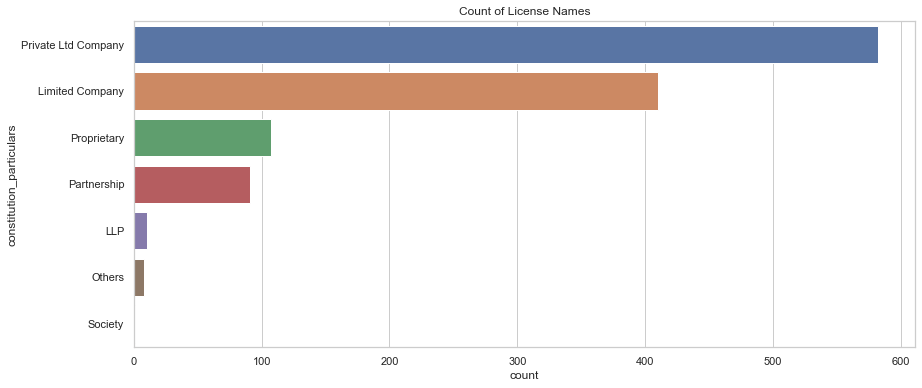

In [30]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the horizontal countplot
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed
sns.countplot(y='constitution_particulars', data=df, order=df['constitution_particulars'].value_counts().index)

# Adding labels and title
plt.title('Count of License Names')

# Show the plot
plt.show()

<span style='color:Blue'>Insights</span>

- The majority of drug manufacturing companies in Telangana are private limited companies. This is likely because private limited companies offer the most protection to their shareholders..<br>

- Private limited companies offer more privacy to their shareholders. The names of the shareholders of a private limited company are not publicly available. This can be important for drug manufacturing companies, as they may want to protect their trade secrets..<br>
- Private limited companies are easier to set up and manage than limited companies. The requirements for setting up a private limited company are less stringent than the requirements for setting up a limited company. This can be important for small and medium-sized enterprises (SMEs), which may not have the resources to comply with the more stringent requirements for limited companies..<br>
- Private limited companies are more tax-efficient than limited companies. The profits of a private limited company are taxed at the lower corporate tax rate. The profits of a limited company are taxed at the higher personal income tax rate. This can be important for drug manufacturing companies, as they may be able to save money on taxes by registering as a private limited company.<br>
- The number of drug manufacturing companies that are LLPs has been increasing over the past few years. This is likely due to the fact that LLPs offer the same liability protection as limited companies, but they also offer some of the flexibility of partnerships.

#  <span style='color:Blue'>Exploring Manufacturing district , mandal, village</span>

In [35]:
#finding value counts by districtname
df['mfg_districtname'].value_counts()

MEDCHAL - MALKAJGIRI    602
SANGAREDDY              275
RANGA REDDY              87
YADADRI BHUVANAGIRI      46
MAHABUBNAGAR             42
SIDDIPET                 42
NALGONDA                 30
MEDAK                    30
HYDERABAD                21
KAMAREDDY                 8
KARIMNAGAR                5
SURYAPET                  4
KHAMMAM                   4
WARANGAL                  3
HANUMAKONDA               3
BHADRADRI                 2
WANAPARTHY                2
VIKARABAD                 1
PEDDAPALLI                1
NIZAMABAD                 1
JOGULAMBA - GADWAL        1
Name: mfg_districtname, dtype: int64

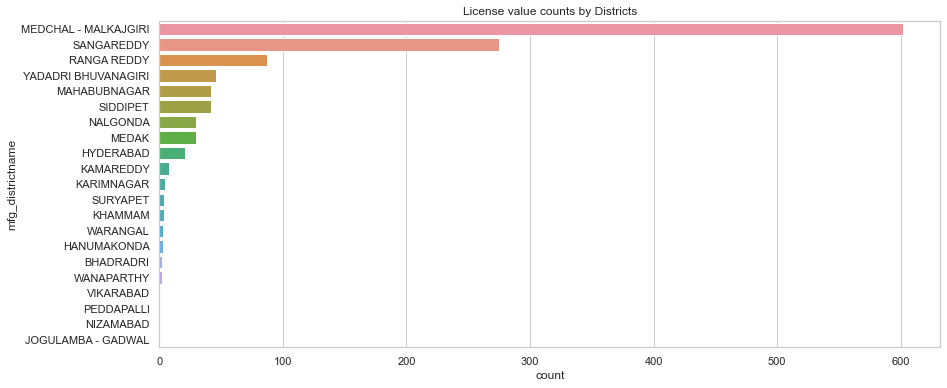

In [44]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the horizontal countplot
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed
sns.countplot(y='mfg_districtname', data=df, order=df['mfg_districtname'].value_counts().index)

# Adding labels and title
plt.title('License value counts by Districts')

# Show the plot
plt.show()

In [36]:

# Filter and display 'mfg_mandalname' and 'mfg_villagename' columns

MEDCHAL_MALKAJGIRI_df = df[df['mfg_districtname'] == 'MEDCHAL - MALKAJGIRI'][['mfg_districtname','mfg_mandalname', 'mfg_villagename' ]]

MEDCHAL_MALKAJGIRI_df

,mfg_districtname,mfg_mandalname,mfg_villagename
0,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla
1,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla
2,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla
3,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla
4,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla
...,...,...,...
1205,MEDCHAL - MALKAJGIRI,Quthbullapur,Jeedimetla
1206,MEDCHAL - MALKAJGIRI,Keesara,Rampally
1207,MEDCHAL - MALKAJGIRI,Kukatpally,Kukatpally
1208,MEDCHAL - MALKAJGIRI,Uppal,Nacharam


In [37]:
#licenses per mandal and village
MEDCHAL_MALKAJGIRI_df.value_counts()

mfg_districtname      mfg_mandalname          mfg_villagename        
MEDCHAL - MALKAJGIRI  Quthbullapur            Jeedimetla                 96
                      Kapra                   Cherlapally                65
                      Kukatpally              Kukatpally                 62
                      Balanagar               Balanagar                  45
                      Quthbullapur            Gajularamaram              38
                      Uppal                   Nacharam                   28
                      Quthbullapur            Jeedimetla - Phase I&II    28
                      Uppal                   Mallapur                   22
                      Dundigal Gandimaisamma  Dommara pochampally        22
                      Uppal                   Uppal Khalsa               20
                      Shamirpet               Turkapally                 20
                      Bachupally              Bachupally                 17
                  

In [38]:

# Filter and display 'mfg_mandalname' and 'mfg_villagename' columns

SANGAREDDY_df = df[df['mfg_districtname'] == 'SANGAREDDY'][['mfg_districtname','mfg_mandalname', 'mfg_villagename' ]]

SANGAREDDY_df

,mfg_districtname,mfg_mandalname,mfg_villagename
591,SANGAREDDY,Hathnoora,Borpatla
592,SANGAREDDY,Gummadidala,Bonthapally
593,SANGAREDDY,Sadasivpet,Nandi Kandi
594,SANGAREDDY,Gummadidala,Annaram
595,SANGAREDDY,Sadasivpet,Aroor
...,...,...,...
861,SANGAREDDY,Patancheru,Pashamylaram
862,SANGAREDDY,Patancheru,Pashamylaram
863,SANGAREDDY,Patancheru,Pashamylaram
864,SANGAREDDY,Patancheru,Pashamylaram


In [39]:
#licenses per mandal and village
SANGAREDDY_df.value_counts()

mfg_districtname  mfg_mandalname   mfg_villagename 
SANGAREDDY        Patancheru       Pashamylaram        82
                  Jinnaram         Bollaram            65
                                   Gaddapotharam       29
                  Gummadidala      Bonthapally         18
                  Patancheru       Patancheru          11
                  Sadasivpet       Aroor                8
                  Gummadidala      Annaram              6
                  Hathnoora        Gundla Machnur       6
                  Jinnaram         Khazipally           6
                  Patancheru       Rudraram             4
                  Ameenpur         Sultanpur            3
                  Kandi            Indrakaran           3
                  Patancheru       Nandigaon            3
                  Kohir            Digwal               3
                  Hathnoora        Chandapur            2
                  Kondapur         Mallepally           2
                  Pa

In [40]:

# Filter and display 'mfg_mandalname' and 'mfg_villagename' columns

RANGA_REDDY_df = df[df['mfg_districtname'] == 'RANGA REDDY'][['mfg_districtname','mfg_mandalname', 'mfg_villagename' ]]

RANGA_REDDY_df

,mfg_districtname,mfg_mandalname,mfg_villagename
865,RANGA REDDY,Rajendranagar,Gaganpahad
866,RANGA REDDY,Rajendranagar,Gaganpahad
867,RANGA REDDY,Kothur,Kothur (CT)
870,RANGA REDDY,Kothur,Kothur (CT)
871,RANGA REDDY,Saroornagar,Kharmanghat
...,...,...,...
1171,RANGA REDDY,Madgul,Kulkulepalle
1177,RANGA REDDY,Kothur,Kothur (CT)
1183,RANGA REDDY,Maheshwaram,Mankhal
1186,RANGA REDDY,Rajendranagar,Gaganpahad


In [41]:
#licenses per mandal and village
RANGA_REDDY_df.value_counts()

mfg_districtname  mfg_mandalname   mfg_villagename   
RANGA REDDY       Kothur           Kothur (CT)           18
                  Rajendranagar    Gaganpahad             9
                  Balapur          Mamidpally             6
                  Nandigama        Mekaguda               6
                                   Nandigama              5
                  Hayathnagar      Bagh Hayathnagar       5
                  Saroornagar      Saroornagar            4
                  Rajendranagar    Katedhan               4
                  Kothur           Thimmapur              4
                  Shamshabad       Golkonda Kalan         3
                  Maheshwaram      Maheswaram             3
                  Madgul           Kulkulepalle           2
                  Serilingampally  Gachibowli             2
                  Abdullapurmet    Kuntloor               2
                                   Pedda Amberpet         2
                  Hayathnagar      Khalsa Haya

<span style='color:Blue'>Insights </span>

* The district with the most pharmaceutical companies in Telangana is Medchal - Malkajgiri district. This district has 591 pharmaceutical companies. The next highest is the Sangareddy district, with 274 pharmaceutical companies.

* This data shows that the pharmaceutical industry in Telangana is concentrated in the Medchal - Malkajgiri district and the Sangareddy district. These districts are likely to have a good research and development environment and attract talented people, which has led to the concentration of pharmaceutical companies.

#  <span style='color:Blue'>Exploring Licenses per year </span>

In [42]:
# Count licenses per year
licenses_per_year = df.groupby('Year')['Year'].count()

print(licenses_per_year)

Year
2018    149
2019    178
2020    287
2021    246
2022    243
2023    107
Name: Year, dtype: int64


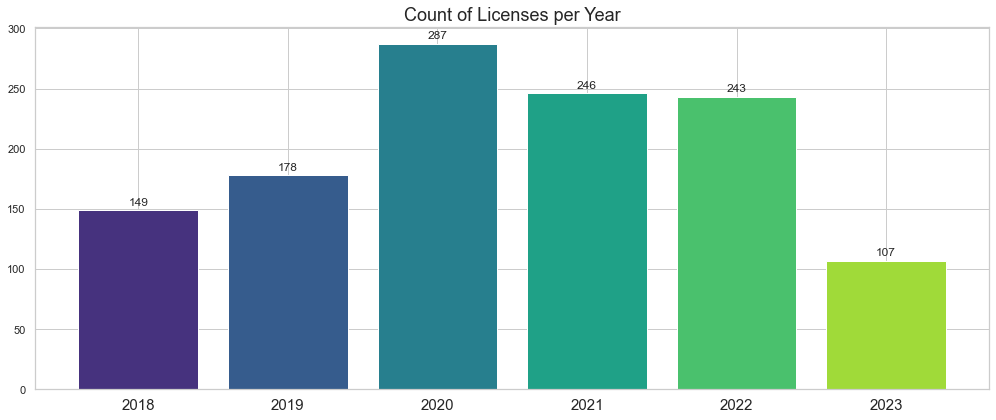

In [56]:
# licenses_per_year defined

years = licenses_per_year.index
counts = licenses_per_year.values

# Use a different color palette, e.g., 'viridis'
colors = sns.color_palette('viridis', len(years))

# Create a bar plot
plt.figure(figsize=(14, 6))
bars = plt.bar(years, counts, color=colors)

plt.title('Count of Licenses per Year', fontsize=18)

# Adding value counts on top of the bars
for bar, count in zip(bars, counts):
    plt.annotate(str(count),
                 xy=(bar.get_x() + bar.get_width() / 2, count),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xticks(fontsize=15)
# Show the plot
plt.tight_layout()
plt.show()


 <span style='color:Blue'>Insights </span>

The number of drug manufacturing licenses obtained has been increasing steadily over the past five years. This is likely due to the growing demand for drugs in the country and the increasing investment in the drug manufacturing industry.
The highest number of drug manufacturing licenses were obtained in the year 2020. This could be due to the COVID-19 pandemic, which led to an increased demand for drugs.

## Over all insights: 


Here are some of the reasons why the number of drug manufacturing licenses obtained has been increasing:

**The growing demand for drugs**: The demand for drugs is increasing due to the growing population, the aging population, and the increasing prevalence of chronic diseases.

**The increasing investment in the drug manufacturing industry:** The investment in the drug manufacturing industry is increasing due to the growing demand for drugs and the government's focus on self-reliance in the pharmaceutical sector.

**The favorable government policies**: The government has introduced a number of favorable policies for the drug manufacturing industry, such as tax breaks and subsidies.


* The drug manufacturing industry in Telangana is growing rapidly. The number of drug manufacturing licenses issued has increased from 2018 till date.
* The majority of drug manufacturing licenses are issued to large companies. This is likely because large companies have the resources to comply with the strict regulations governing the drug manufacturing industry.
* The drug manufacturing industry in Telangana is diverse. There are a variety of companies involved in the industry, from small startups to large multinational corporations.
* The drug manufacturing industry in Telangana is export-oriented. Many of the companies in the industry export their products to other countries.
* The Medchal - Malkajgiri district is the leading district in terms of the number of drug manufacturing licenses issued. This is likely due to the presence of a good research and development environment and the availability of skilled labor in the district.
* The majority of drug manufacturing licenses are issued to companies located in the urban areas of Telangana. This is likely because the urban areas have better infrastructure and access to resources, such as raw materials and skilled labor.
* The number of drug manufacturing licenses obtained has been increasing steadily over the past five years. This is likely due to the growing demand for drugs in the country and the increasing investment in the drug manufacturing industry.
* The highest number of drug manufacturing licenses were obtained in the year 2020. This could be due to the COVID-19 pandemic, which led to an increased demand for drugs.


Overall, the data shows that the drug manufacturing industry in Telangana is growing and vibrant. The industry is dominated by large companies, but there is also a significant presence of small startups. The industry is export-oriented and is likely to continue to grow in the coming years.


## <span style="color:Green">Advantages for Ancillary Industries</span>

Here are some of the Positive Effects on Associated Industries that can grow as the drug manufacturing industry increases:

* **Packaging industry:** The packaging industry will need to grow to meet the demand for packaging for drugs. This includes the packaging of finished drugs, as well as the packaging of raw materials and intermediates used in drug manufacturing.
* **Logistics industry:** The logistics industry will need to grow to transport drugs to their final destination. This includes the transportation of finished drugs, as well as the transportation of raw materials and intermediates used in drug manufacturing.
* **Testing industry:** The testing industry will need to grow to test drugs for safety and efficacy. This includes the testing of finished drugs, as well as the testing of raw materials and intermediates used in drug manufacturing.
* **Research and development industry:** The research and development industry will need to grow to develop new drugs. This includes the research and development of new drugs, as well as the research and development of new methods for manufacturing drugs.
* **Education and training industry:** The education and training industry will need to grow to train people in the drug manufacturing industry. This includes training in drug manufacturing, as well as training in the related fields of packaging, logistics, testing, and research and development.

Overall, the growth of the drug manufacturing industry will have a positive impact on the economy as a whole. It will create jobs, boost economic growth, and improve the quality of life for people around the world.

## <span style="color:Brown">Role of Government</span>

The government can play a role in ensuring the safety of people and the environment by:

* **Enforcing GMPs**: The government can enforce GMPs by inspecting drug manufacturing plants and taking action against those that are not in compliance.
* **Requiring Environmental impact assessment ( EIAs):** The government can require EIAs for drug manufacturing plants to ensure that they do not pollute the environment.
* **Regulating waste disposal**: The government can regulate the disposal of waste from drug manufacturing plants to ensure that it is done in a safe and environmentally responsible manner.
* **Providing worker safety regulations**: The government can provide worker safety regulations to protect workers in drug manufacturing plants.
* **Requiring product testing:** The government can require drug manufacturing plants to test their products before they are released to the market to ensure that they are safe and effective.

By taking these steps, the government can help to ensure that the drug manufacturing industry operates in a safe and responsible manner.

The government can enhance the growing drug manufacturing industry in a number of ways, including:

* **Provide incentives for research and development:** The government can provide financial incentives for drug companies to invest in research and development of new drugs. This can be done through tax breaks, grants, or other forms of financial assistance.
* **Streamline the regulatory process:** The government can streamline the regulatory process for drug approval to make it easier for drug companies to bring new drugs to market. This can be done by reducing the number of steps involved in the approval process and by making the process more efficient.
* **Invest in infrastructure:** The government can invest in infrastructure, such as roads, ports, and power plants, to make it easier for drug companies to transport their products and to get the raw materials they need.
* **Provide education and training:** The government can provide education and training to workers in the drug manufacturing industry to help them stay up-to-date on the latest technologies and practices. This can be done through government-run training programs or by providing financial assistance to companies that train their workers.
* **Promote exports:** The government can promote exports of drugs to help drug companies reach a wider market. This can be done through trade missions, marketing campaigns, and other forms of assistance.

By taking these steps, the government can help to create a more favorable environment for the drug manufacturing industry to grow and thrive.


**Conclusion:**

The analysis of the drug manufacturing license dataset has provided valuable insights into the pharmaceutical industry within the region. Here are the key findings and conclusions drawn from our analysis:

1. **License Trends:** Over the years, there has been a noticeable trend in the issuance of drug manufacturing licenses, with fluctuations in the number of licenses granted annually. This trend may reflect changes in the pharmaceutical landscape and regulatory environment.

2. **Key Players:** Several companies have emerged as dominant players in the industry, holding a significant number of drug manufacturing licenses. These companies play a crucial role in the pharmaceutical sector .

3. **Geographical Distribution:** The analysis of district-level data has shown that drug manufacturing licenses are concentrated mostly around 3 districts in Telangana.

4. **Ancillary Industries:** The pharmaceutical sector has a substantial impact on ancillary industries, providing opportunities for supporting sectors to grow and thrive. This symbiotic relationship benefits various industries associated with drug manufacturing.

5. **Role of Government:** The Telangana Drugs Control Administration plays a pivotal role in regulating and monitoring the pharmaceutical industry. Government policies and regulations directly influence the licensing and operation of pharmaceutical companies.

In summary, the drug manufacturing license dataset serves as a valuable resource for understanding the pharmaceutical landscape in the region. It offers insights into licensing trends, key industry players, geographic distribution, regulatory aspects, and the relationship between the pharmaceutical industry and ancillary sectors. These insights can inform policy decisions, industry strategies, and quality control measures to enhance the pharmaceutical sector's growth and safety in the state.

## <span style="color:#ff00ff">Thank you for reading till the end.</span>

### Raviteja Padala

<img align="left" img src= in.png height = 20 width="20"/>   https://www.linkedin.com/in/raviteja-padala/ 